### The Task

Your objective is to understand and parepare the dataset for analysis, train a predictive model  for classifiying ( distinguishing ) diseased patient (metabolic disorder) from a healthy individual and evaluate the model. 



A complete list of analysis can be found below. 

1. Load the data set. 

2. Exploratory analysis to better understand the data.

    2.1 Example : Properties of features, outliers, missingness, correlation bwtween features \
    2.2 How will you divide training and test data.

3. How will you deal with missing data. Clearly explain your approach.      

4. Unsupervised analysis. Investigate trends and patters in data through some unsupervised learning approaches.
    4.1 Please also look for inherent sub group of patients

5. Train a supervised predictive model (also known as  classifier ).
    5.1 Train classifiers. You can train multiple classifiers and see which one works best. 
    5.2 Evaluate your model training performance.  
    5.3 Use and compare different performance evaluation metrics
    5.4 Use cross validation to evaluate variation in training perforamnce 
    5.5 Is your model overfitting ? 

6. Result interpretation
    6.1 Which is the most important feature ?
    6.2 What happens to your classification performance if you exclude the best feature and retrain your classifier ?  

7. Prepare a presentation with your analysis summary and result  

In [1]:
import pandas as pd
import seaborn as sns
import seaborn_image as isns
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize, StandardScaler as sc, LabelEncoder, RobustScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier

In [2]:
ds1 = pd.read_csv('patients_01.csv')
clustered_df = pd.read_csv('clusters.csv')
big_df = pd.read_csv('clusters_big.csv')
our_df = pd.read_csv('ourdata.txt')
cluster0_df = pd.read_csv('uns_new_0_.csv')
cluster1_df = pd.read_csv('uns_new_1_.csv')
cluster2_df = pd.read_csv('uns_new_2_.csv')
clusters3_df = pd.read_csv('threeclusters.csv')
clusters2_df = pd.read_csv('twoclusters.csv')
rfc_df = pd.read_csv('randomforest_withandwithout.txt')
metrics_df = pd.read_csv('metrics_Skynet_with_important.txt')
confusion_df = pd.read_csv('confusion.txt')

In [3]:
#check dataframes
clustered_df.head()
rfc_df.head()
clusters3_df.head()
metrics_df.head()
clusters2_df.head()

print(min(ds1['bmi']))
print(ds1['high_bp'].unique())
ds1.head()

0
['normal' 'high']


,age,gender,bmi,high_chol,chol_check,history_stroke,history_heart_disease,history_smoking,amount_activity,alcohol_misuse,fruits,vegetables,health_gen,health_ment,health_phys,walking_diff,high_bp,dissease
0,68,female,20,normal,checked,False,False,False,active,2.0,True,True,1.0,0.0,0.0,False,normal,False
1,54,female,47,normal,checked,False,False,True,active,1.0,True,True,3.0,0.0,0.0,False,normal,False
2,55,female,30,normal,checked,False,False,False,active,0.0,True,True,1.0,0.0,0.0,False,high,False
3,44,female,19,normal,notchecked,False,False,NaN,active,6.0,True,True,3.0,20.0,6.0,False,normal,False
4,61,male,32,normal,checked,False,False,False,NaN,NaN,True,NaN,2.0,0.0,0.0,True,normal,False


In [4]:
#change legend labels
gen_list = ['Without General Health','Without General Health','Without General Health','Without General Health',
            'With General Health','With General Health','With General Health','With General Health']
rfc_df['Withorwithout'] = gen_list

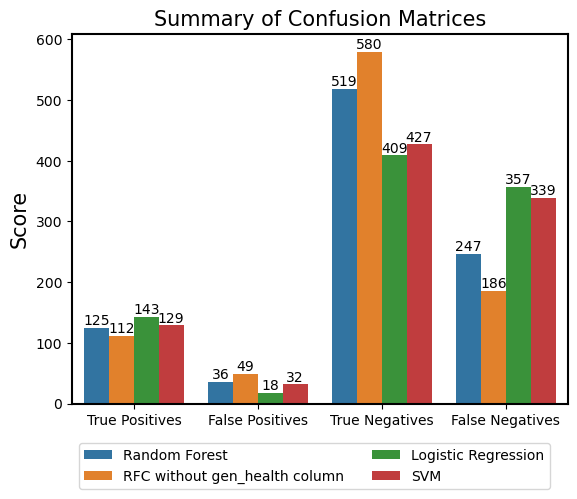

In [5]:
#confusion matrix summary - analysis of 3 models
plot = sns.barplot(data=confusion_df,x='score_name',y='Score',hue='Name')
plot.set(xlabel=None,title='Summary of Confusion Matrices')
for i in plot.containers:
    plot.bar_label(i,)
sns.move_legend(plot,'lower left',
    bbox_to_anchor=(0, -0.25),title='',frameon=True,ncol=2)
[plot.axvline(x+.5,color='w',linewidth=2) for x in plot.get_xticks()]

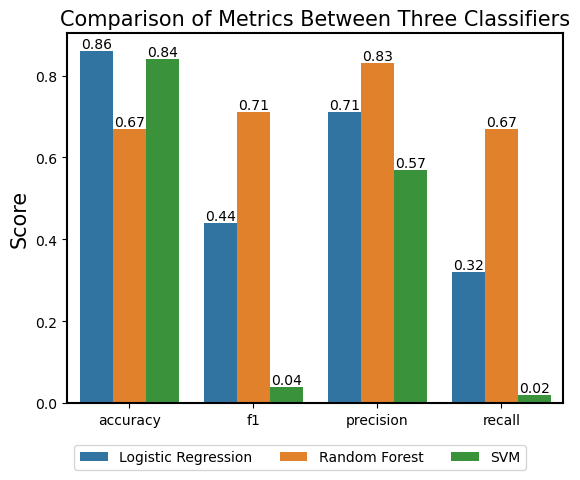

In [6]:
#comparison of metrics graph
plot = sns.barplot(data=metrics_df,x='score_name',y='score',hue='type')
plot.set(xlabel=None,ylabel='Score',title='Comparison of Metrics Between Three Classifiers')
sns.move_legend(plot,'lower left',
    bbox_to_anchor=(0, -0.2),title='',frameon=True,ncol=3)
[plot.axvline(x+.5,color='w',linewidth=2) for x in plot.get_xticks()]
for i in plot.containers:
    plot.bar_label(i,)

{'axes.facecolor': '#EAEAF2',
 'axes.edgecolor': 'white',
 'axes.grid': True,
 'axes.axisbelow': True,
 'axes.labelcolor': '.15',
 'figure.facecolor': 'white',
 'grid.color': 'white',
 'grid.linestyle': '-',
 'text.color': '.15',
 'xtick.color': '.15',
 'ytick.color': '.15',
 'xtick.direction': 'out',
 'ytick.direction': 'out',
 'lines.solid_capstyle': <CapStyle.round: 'round'>,
 'patch.edgecolor': 'w',
 'patch.force_edgecolor': True,
 'image.cmap': 'rocket',
 'font.family': ['sans-serif'],
 'font.sans-serif': ['Arial',
  'DejaVu Sans',
  'Liberation Sans',
  'Bitstream Vera Sans',
  'sans-serif'],
 'xtick.bottom': False,
 'xtick.top': False,
 'ytick.left': False,
 'ytick.right': False,
 'axes.spines.left': True,
 'axes.spines.bottom': True,
 'axes.spines.right': True,
 'axes.spines.top': True}

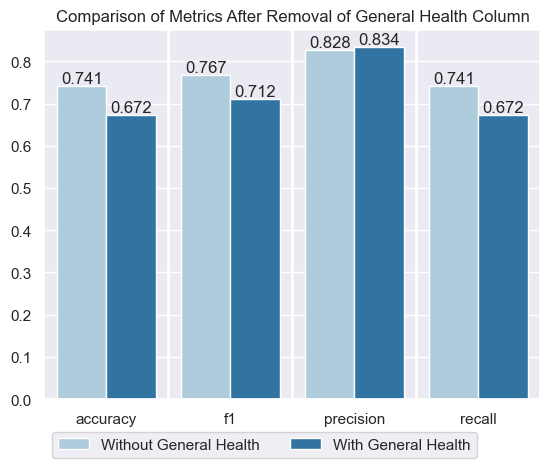

In [7]:
#random forest comparison plot
sns.set_palette("Paired")
sns.set_context("notebook")
sns.set_style("darkgrid")
plot = sns.barplot(data=rfc_df,x='score_name',y='score',hue='Withorwithout')
plot.set(title='Comparison of Metrics After Removal of General Health Column')
plot.set(xlabel=None,ylabel=None)
sns.move_legend(plot,'lower left',
    bbox_to_anchor=(0, -0.18),title='',frameon=True,ncol=2)
[plot.axvline(x+.5,color='w',linewidth=2) for x in plot.get_xticks()]
for i in plot.containers:
    plot.bar_label(i,)
sns.axes_style()

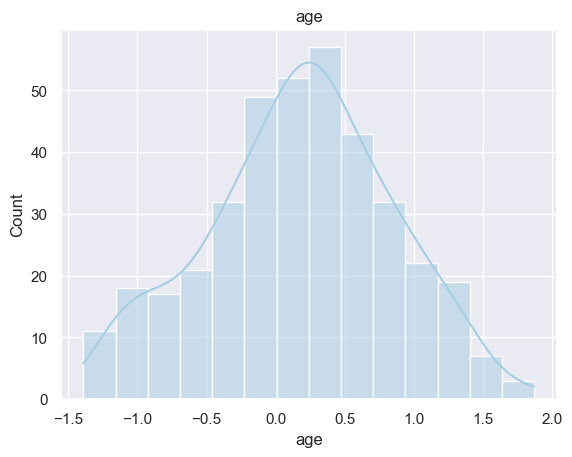

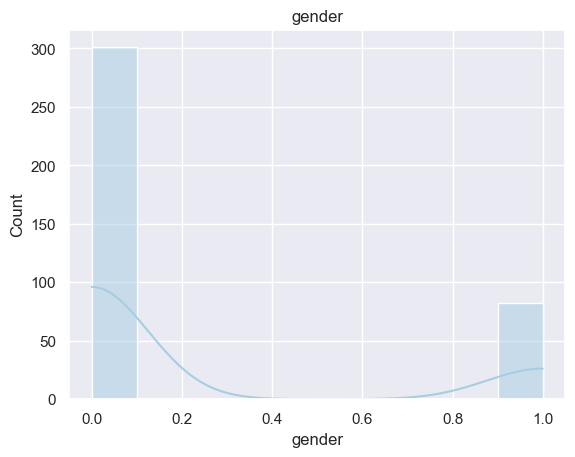

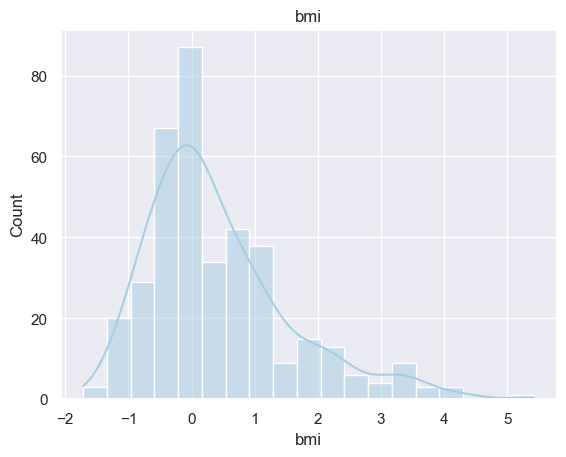

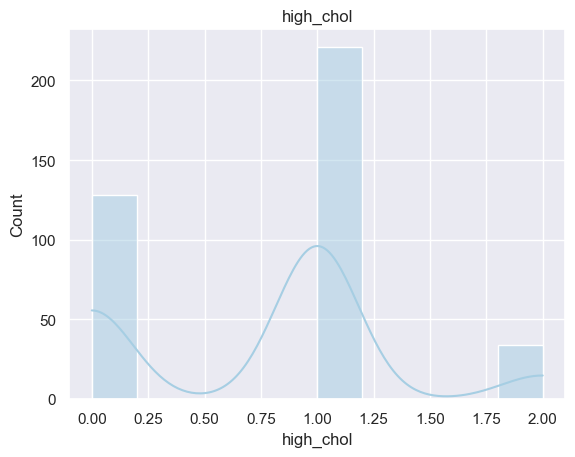

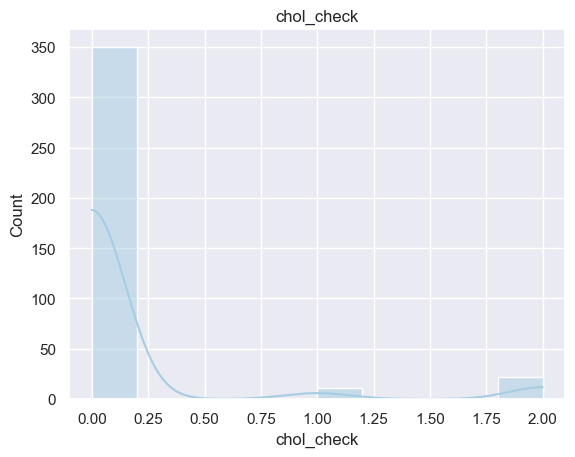

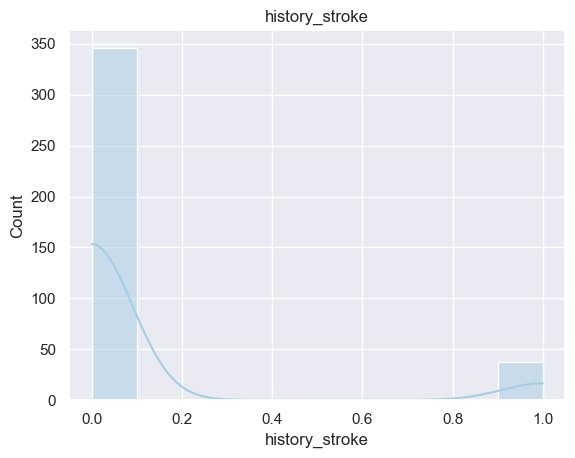

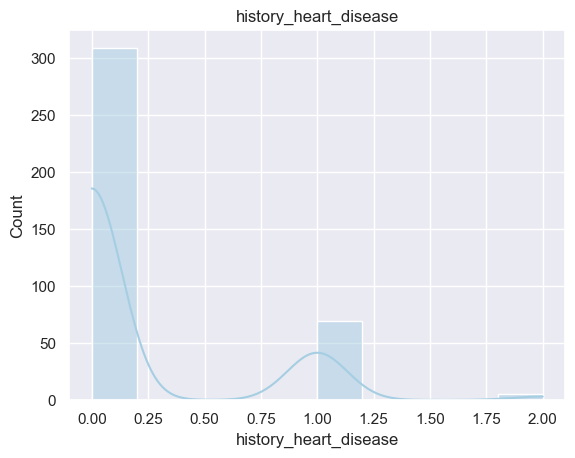

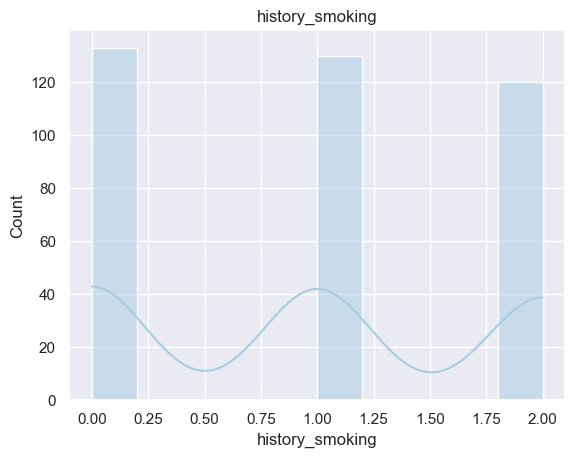

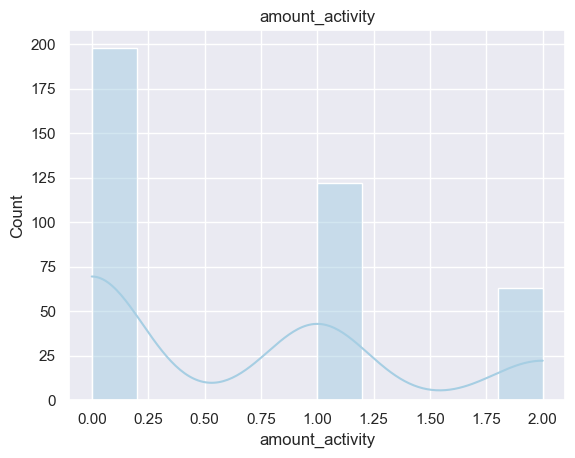

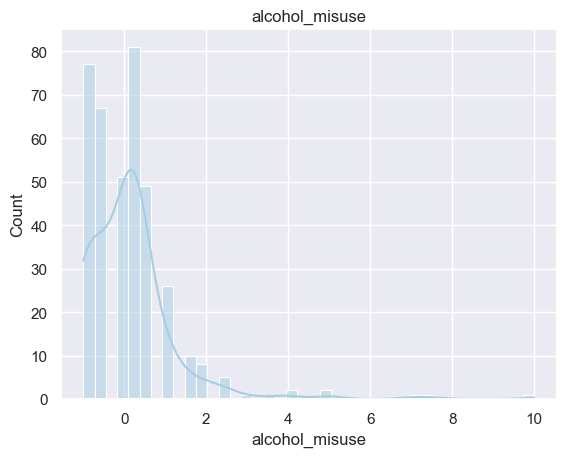

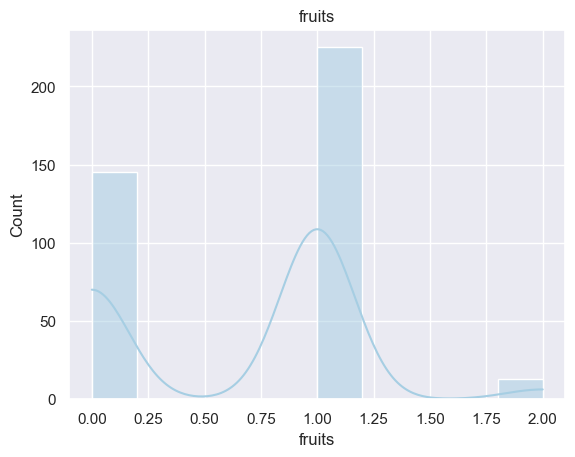

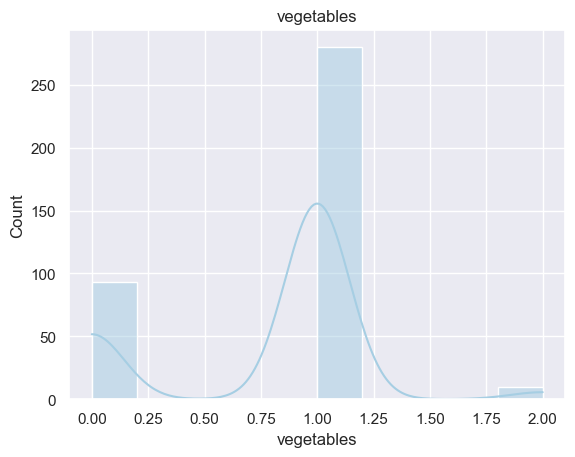

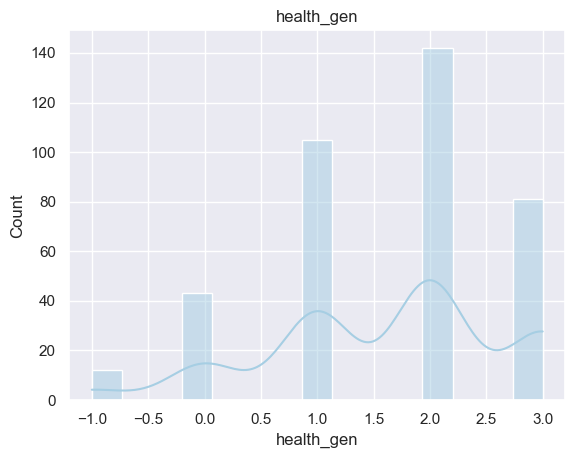

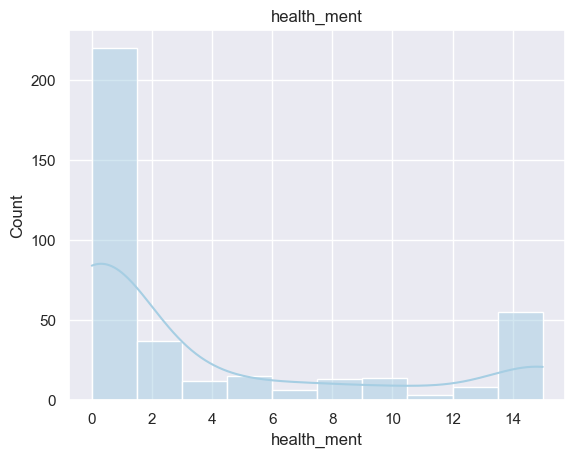

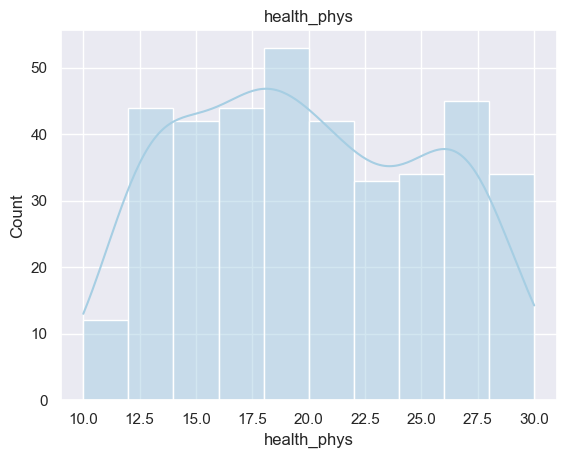

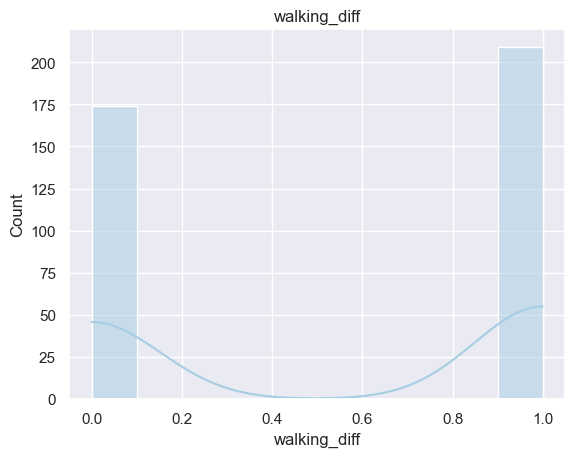

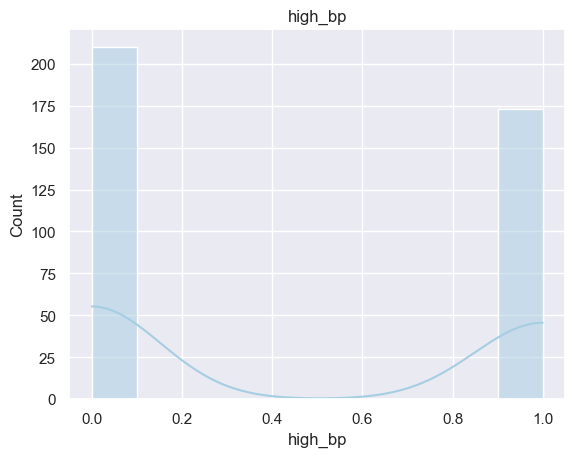

<Figure size 640x480 with 0 Axes>

In [8]:
#histogram generation - exploratory analysis of cluster comparison
cols = ['age','gender','bmi','high_chol','chol_check','history_stroke','history_heart_disease','history_smoking','amount_activity',
        'alcohol_misuse','fruits','vegetables','health_gen','health_ment','health_phys','walking_diff','high_bp']

for col in cols:
    sns.histplot(clustered_df,x=col,kde=True).set(title=col)
    plt.show()
    plt.clf()

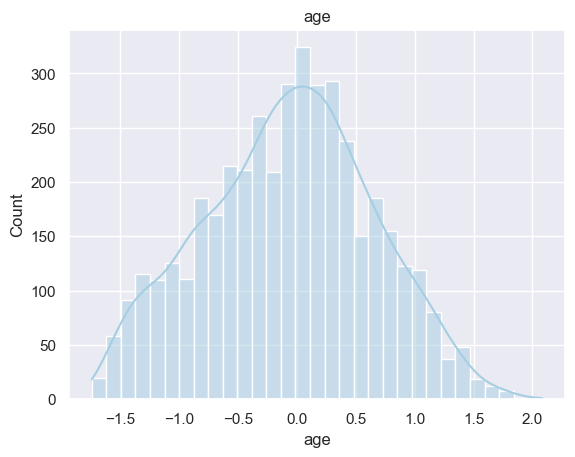

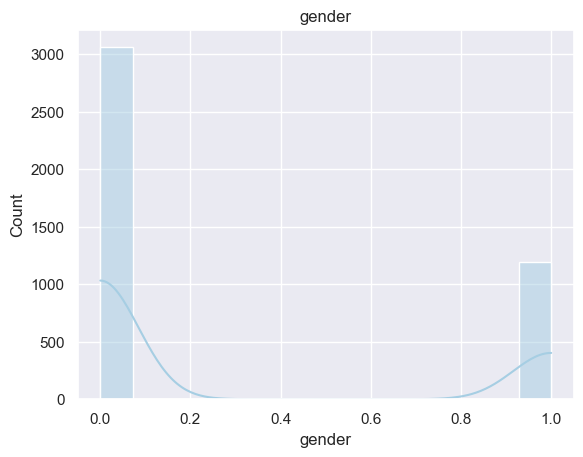

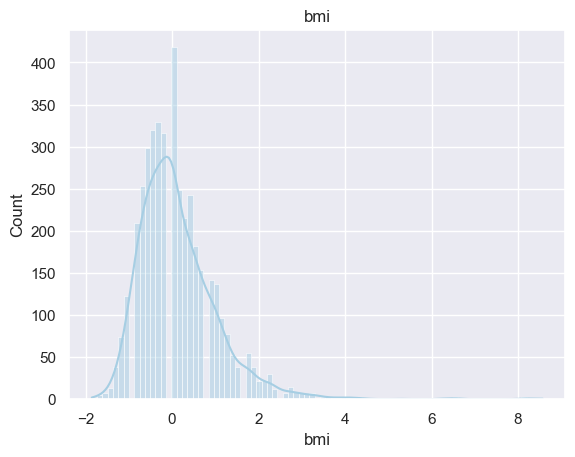

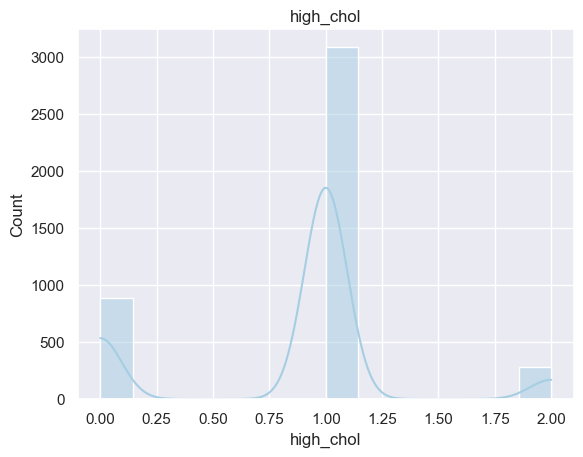

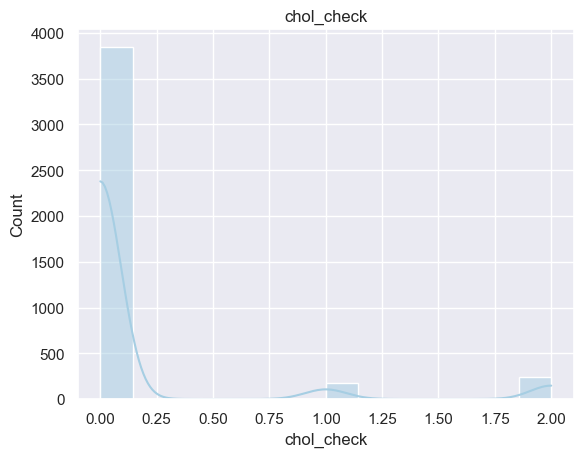

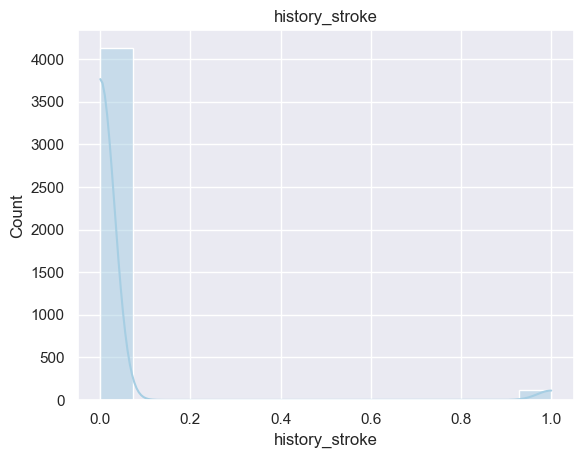

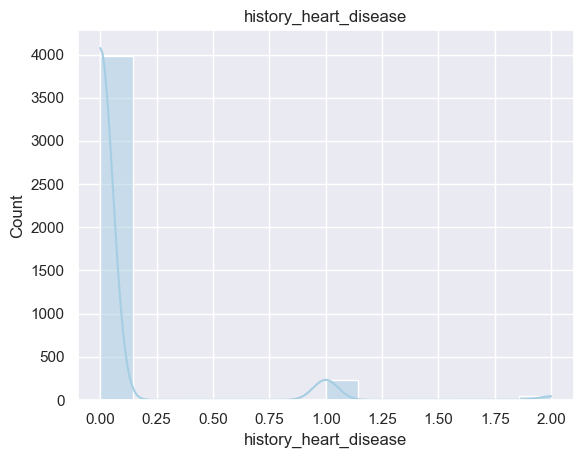

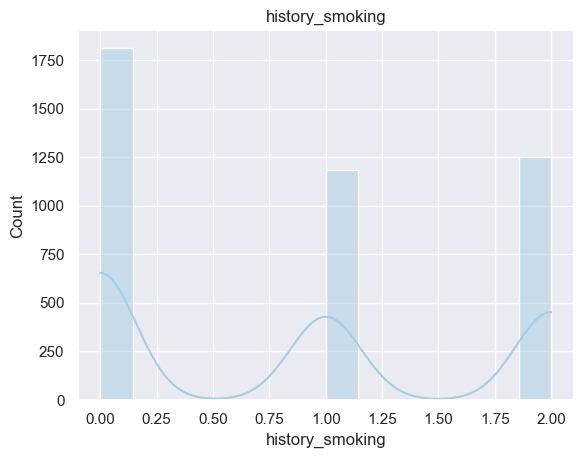

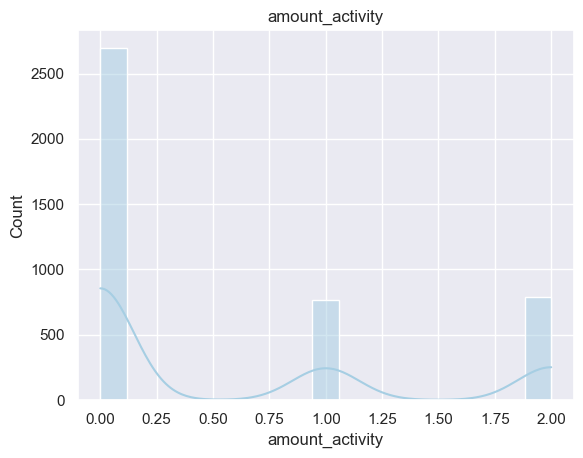

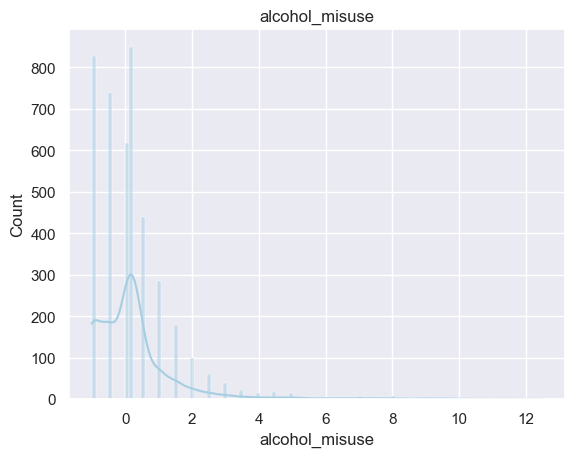

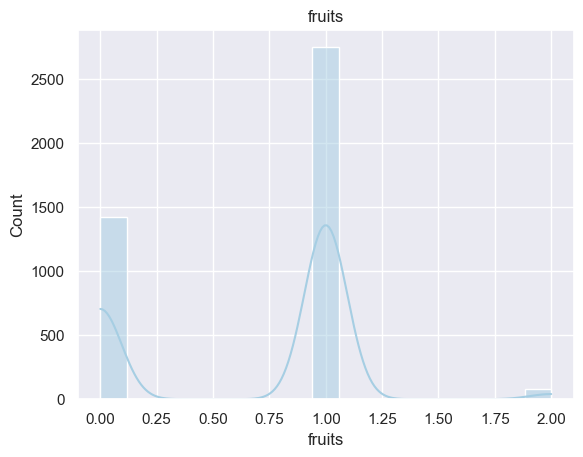

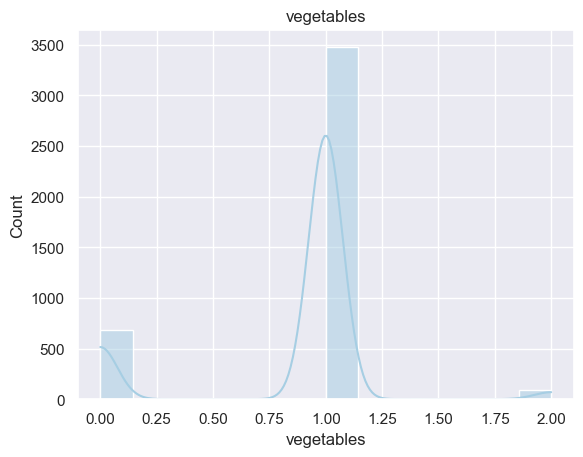

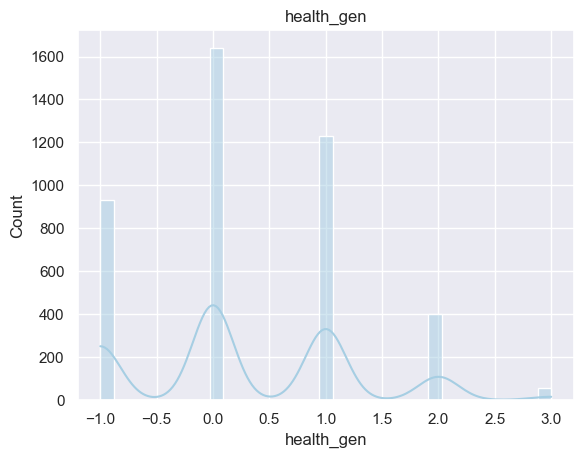

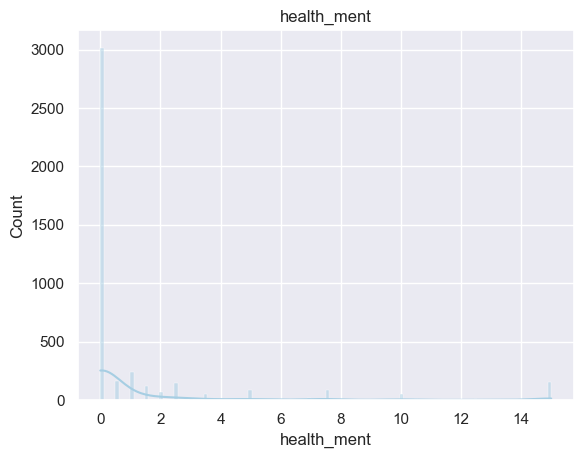

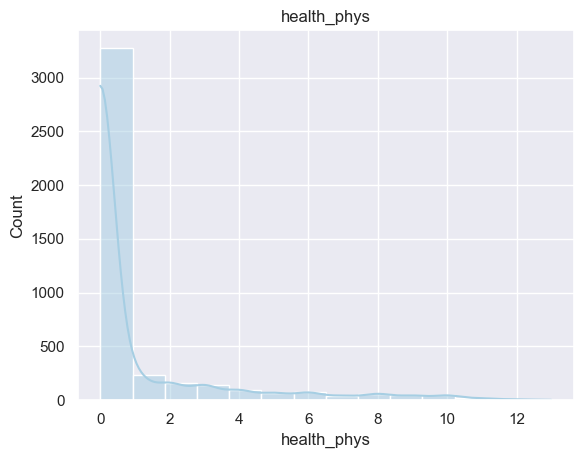

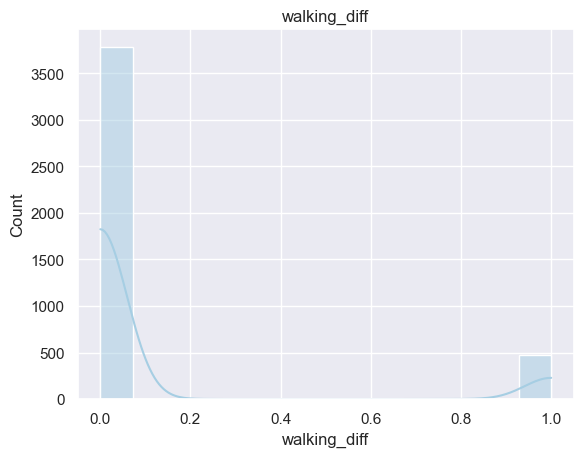

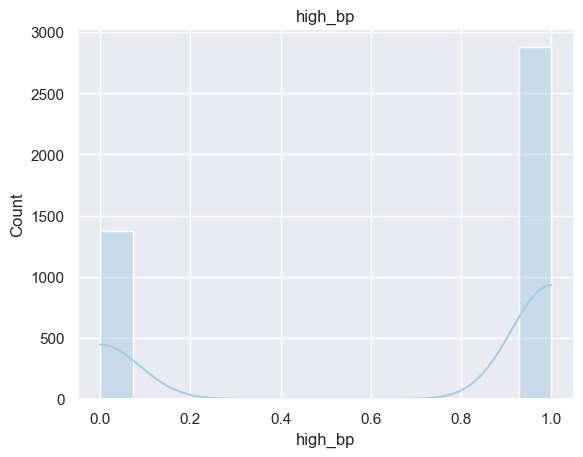

<Figure size 640x480 with 0 Axes>

In [9]:
for col in cols:
    sns.histplot(big_df,x=col,kde=True).set(title=col)
    plt.show()
    plt.clf()

#cluster A is a slightly older population shows those who were sick more than 10 days last month, lower bp
#and more of the patients had walking difficulty. Interestingly, this group of patients rated their general health
#as overall higher than the second cluster

In [10]:
#changing the column name of dissease to disease
ds1 = ds1.rename(columns={"dissease":"disease"})

#results of this call show some nonsense values, such as 0 bmi, 87 days of poor physical health in one month
ds1.describe() 

#filter out nonsense values
ds1 = ds1.loc[ds1['bmi']!=0]
ds1 = ds1.loc[ds1['health_phys']<=30]

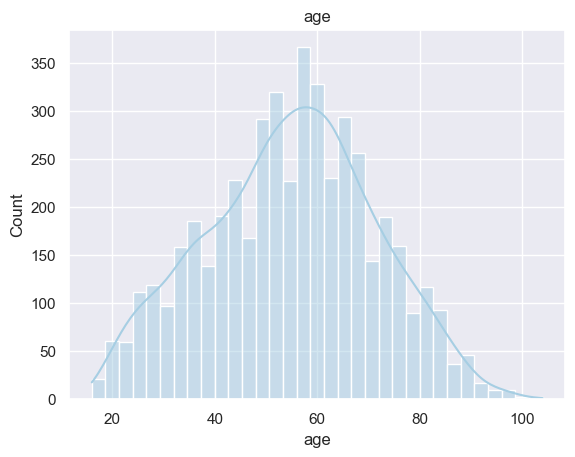

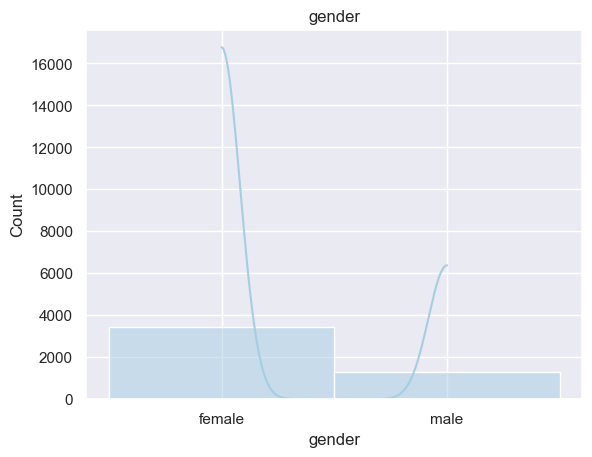

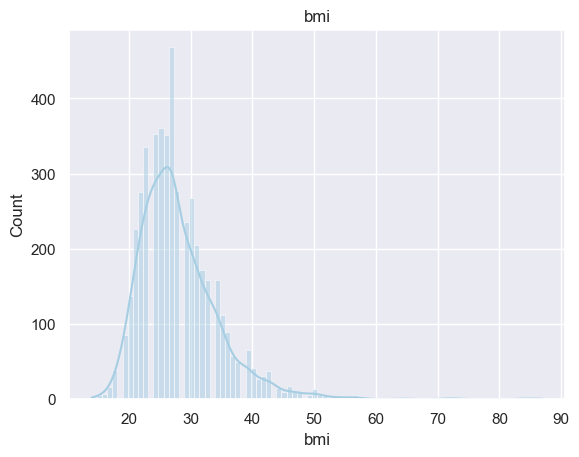

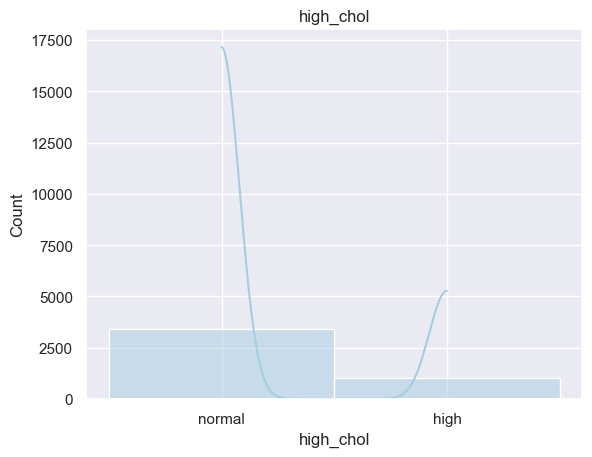

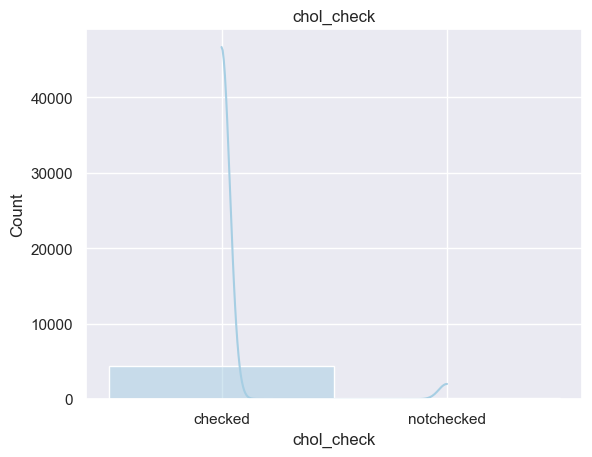

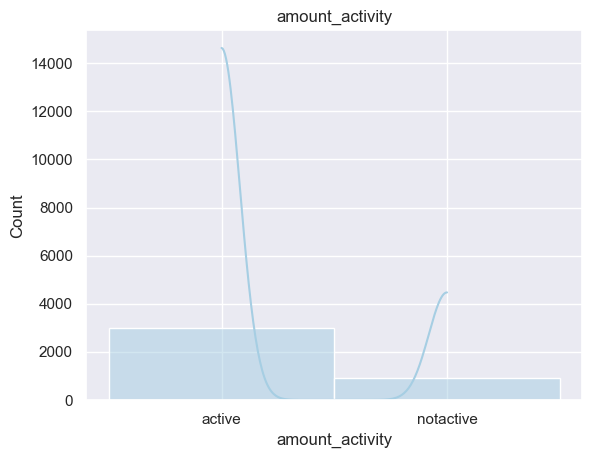

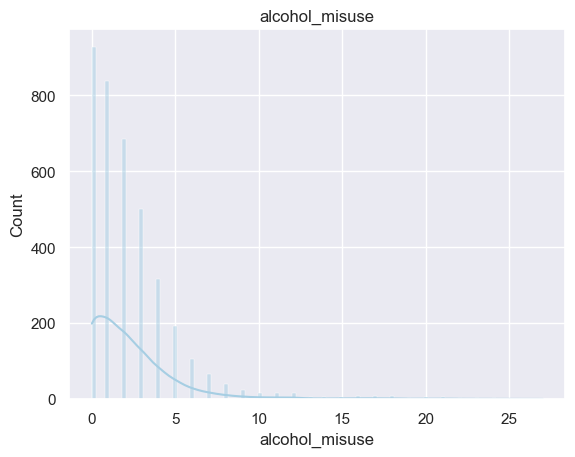

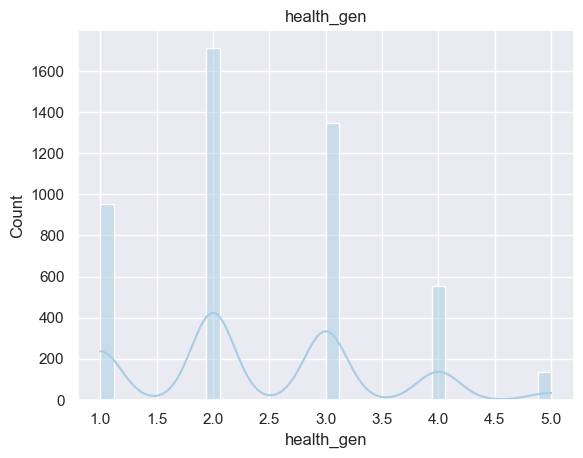

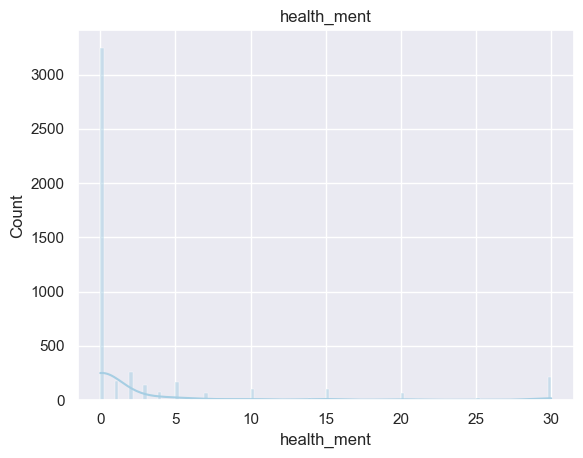

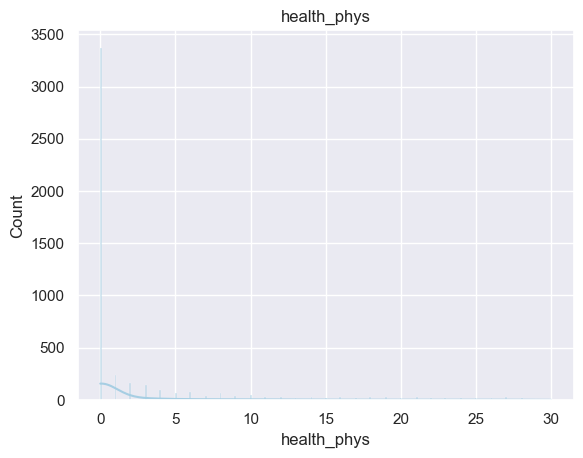

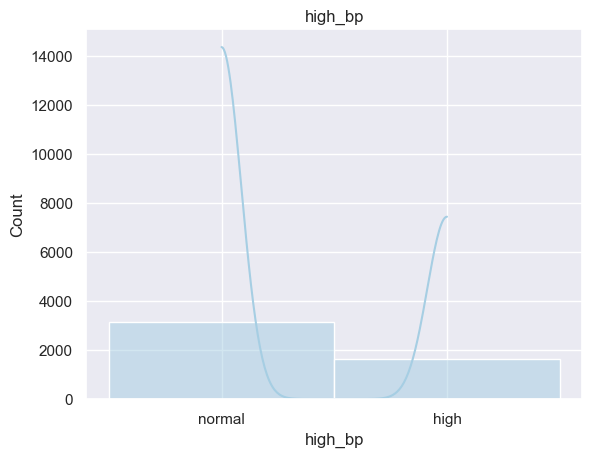

<Figure size 640x480 with 0 Axes>

In [11]:
#list of columns without true/false vals
nonbool_list = ['age','gender','bmi','high_chol','chol_check','amount_activity','alcohol_misuse','health_gen','health_ment',
            'health_phys','high_bp']

#subset of dataframe with only numerical columns
num_list = ds1[['age','bmi','alcohol_misuse','health_gen','health_ment','health_phys','disease']]

#plot histograms for all columns without boolean values
for col in nonbool_list:
    sns.histplot(ds1,x=col,kde=True).set(title=col)
    plt.show()
    plt.clf()

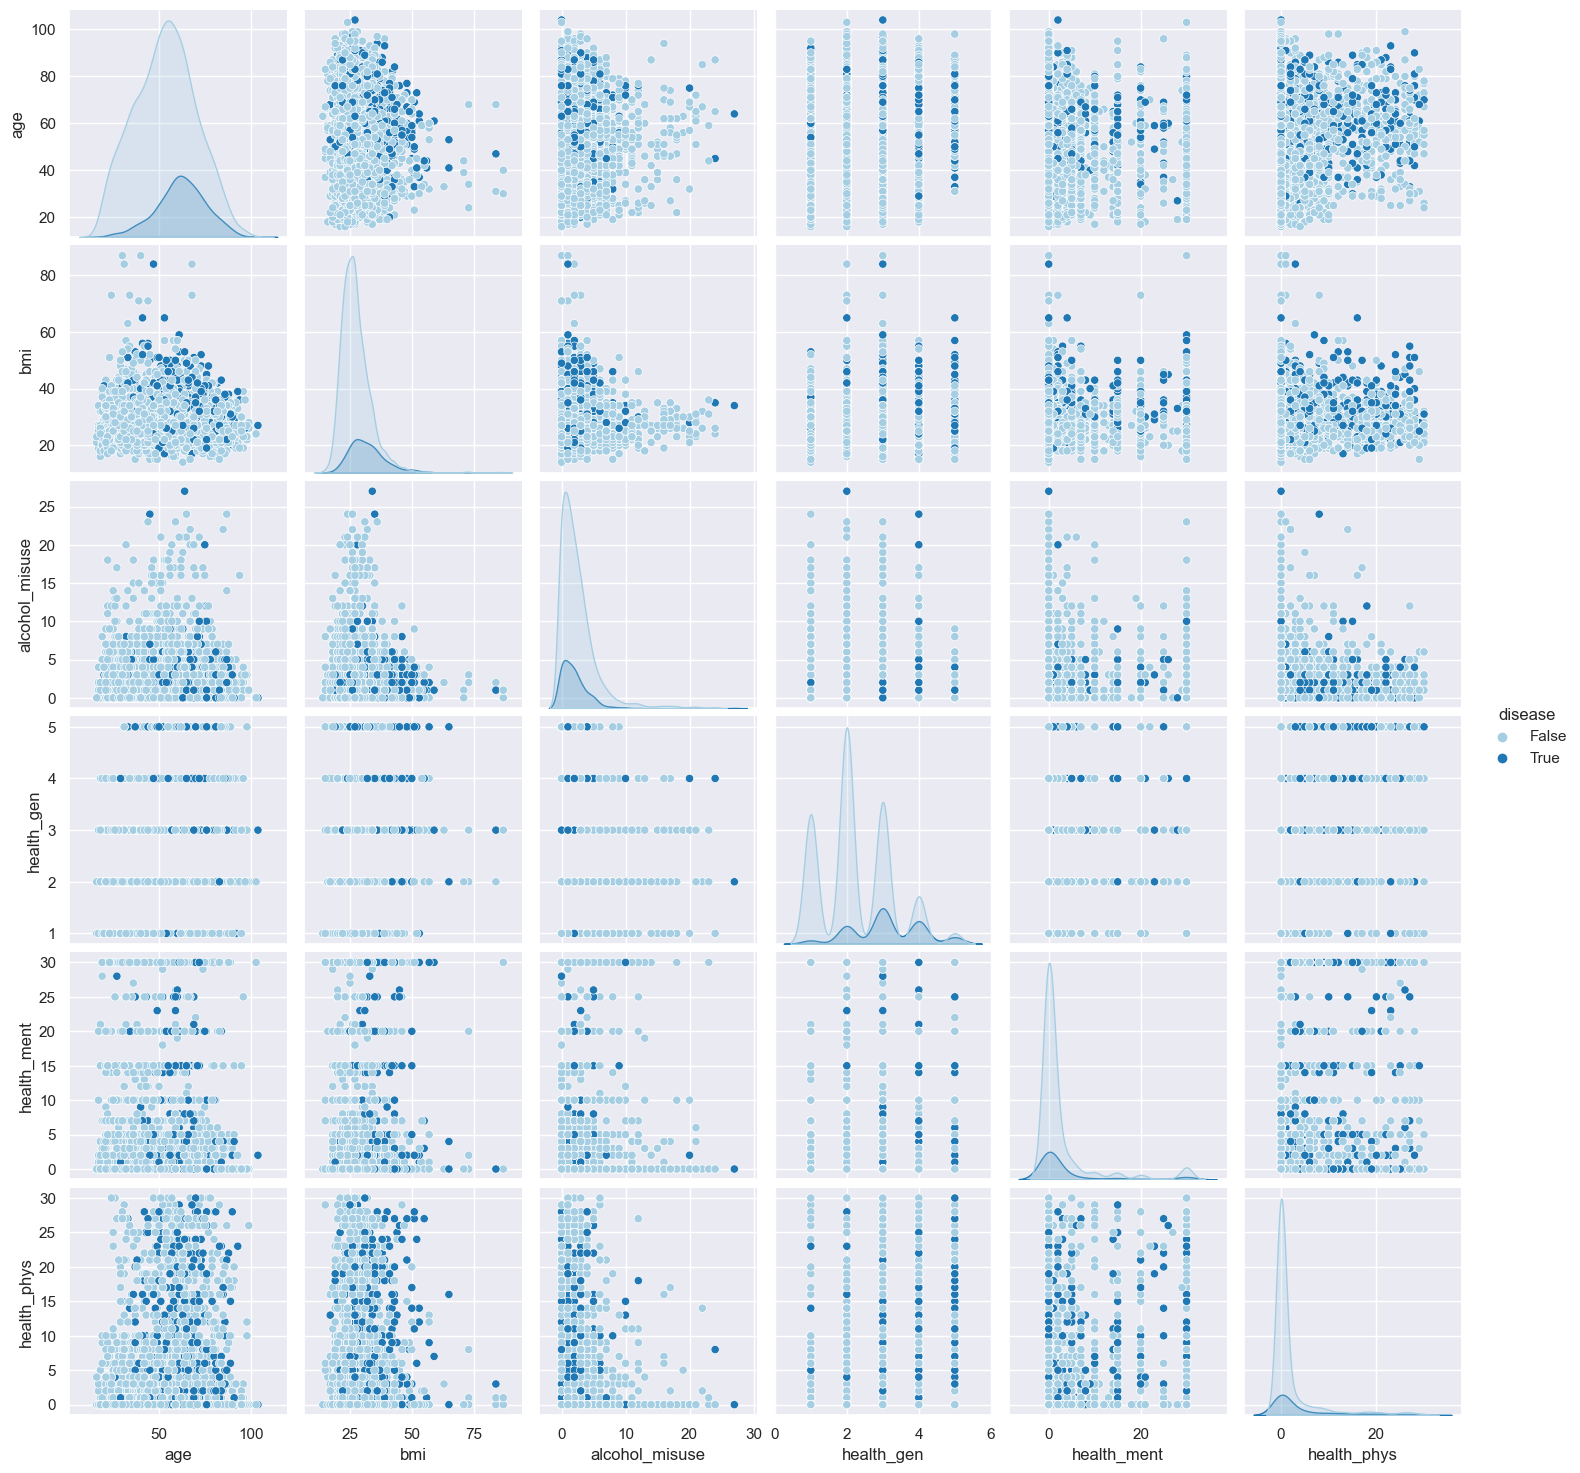

In [12]:
#scatterplot matrix for to show associations between numerical values
sns.pairplot(num_list, hue="disease")

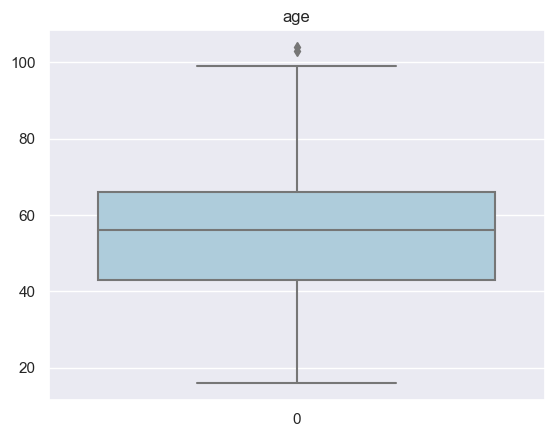

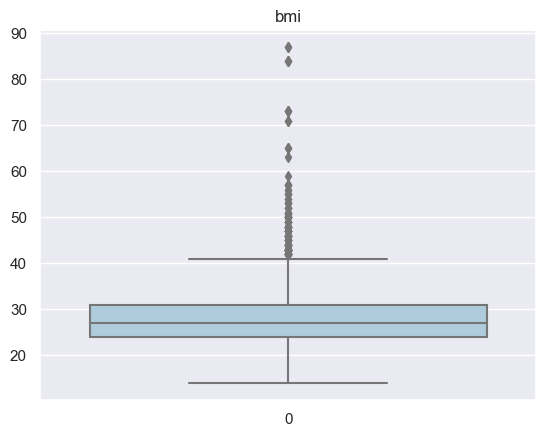

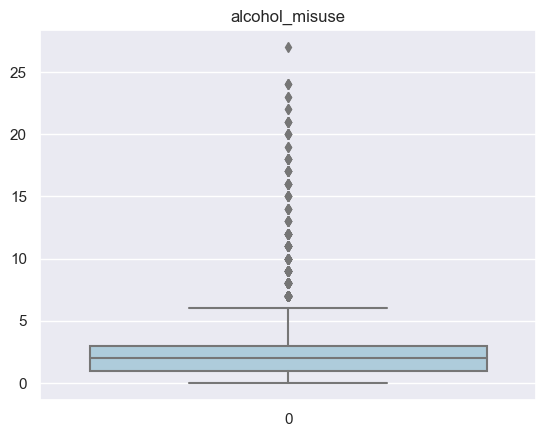

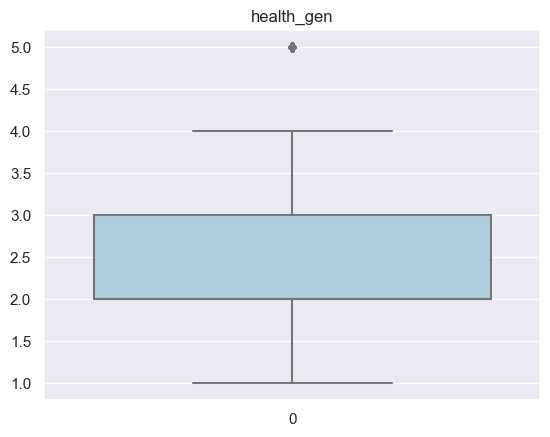

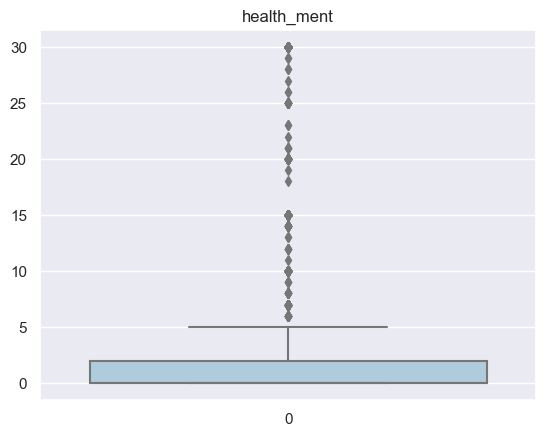

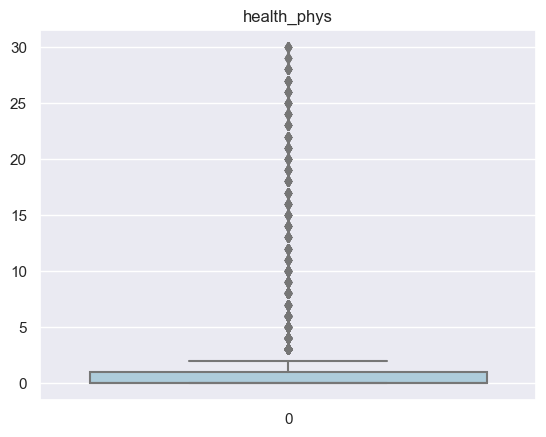

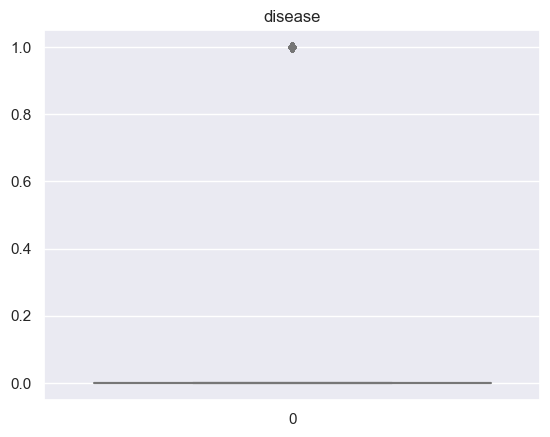

<Figure size 640x480 with 0 Axes>

In [13]:
#boxplots for numerical columns
for col in num_list:
    sns.boxplot(data=ds1[col]).set(title=col)
    plt.show()
    plt.clf()
    

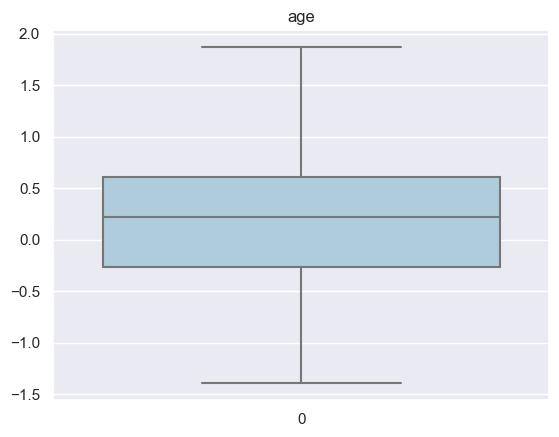

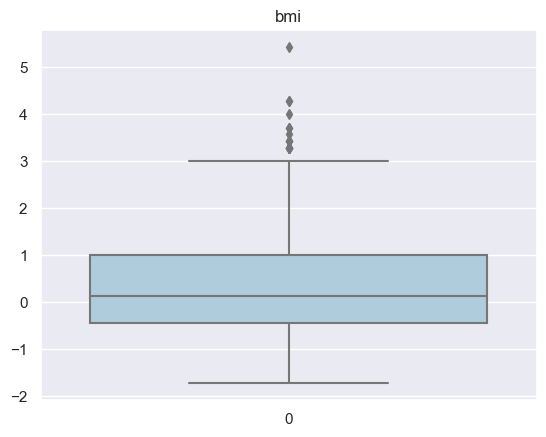

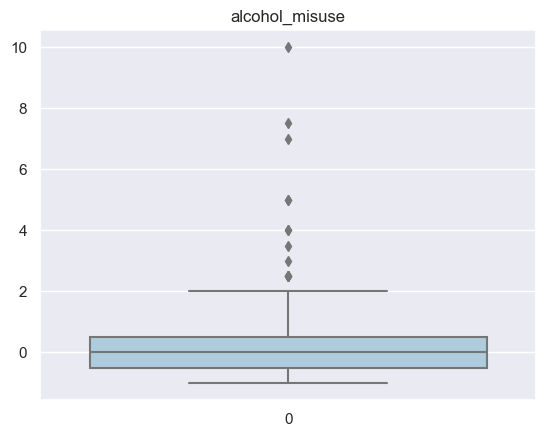

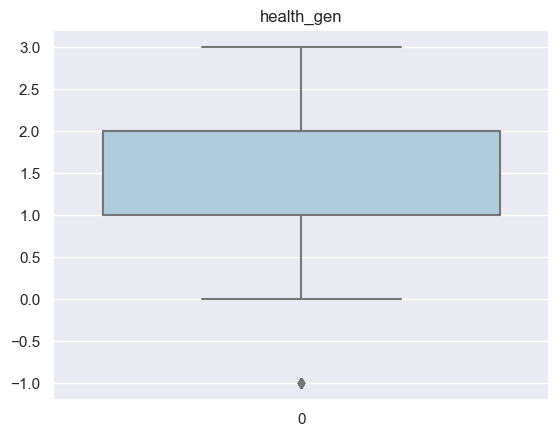

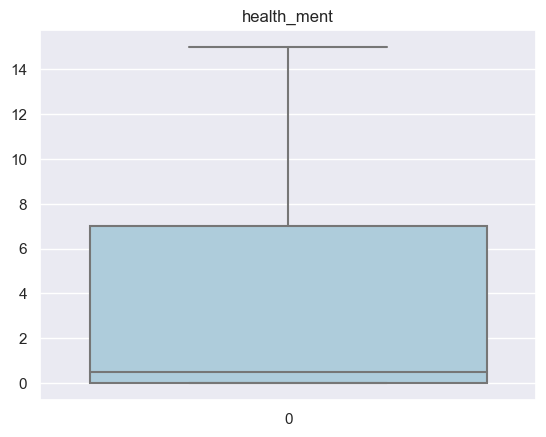

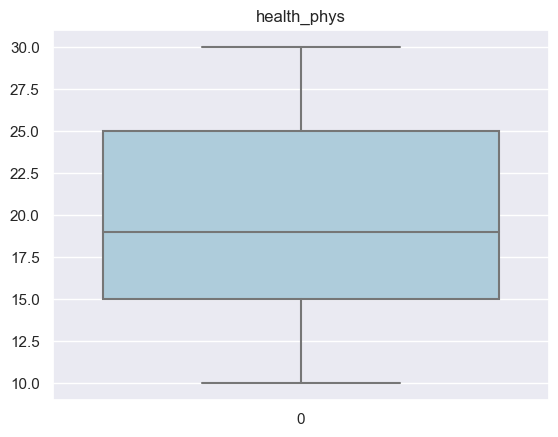

KeyError: 'disease'

<Figure size 640x480 with 0 Axes>

In [14]:
for col in num_list:
    sns.boxplot(data=clustered_df[col]).set(title=col)
    plt.show()
    plt.clf()

In [17]:
#three clusters in one csv
df = pd.concat([cluster0_df, cluster1_df, cluster2_df])

#two clusters in one csv
df_twoclusters = pd.concat([clustered_df, big_df])
clusters3_df = clusters3_df[['age','gender','bmi','health_gen','health_ment','health_phys','Clusters']]
clusters2_df = df_twoclusters[['age','bmi','health_gen',
                               'health_ment','health_phys','walking_diff','Subpopulation']]

#print(clusters3_df['Subpopulation'].unique())

In [18]:
#normalize values so the y axis can be the same
#clusters2a_df = clusters2_df.drop('Subpopulation', axis=1)
norm2_df = (clusters2_df-clusters2_df.min())/(clusters2_df.max()-clusters2_df.min())
norm3_df = (clusters3_df-clusters3_df.min())/(clusters3_df.max()-clusters3_df.min())
norm3_df.head()

,age,gender,bmi,health_gen,health_ment,health_phys,Clusters
0,0.590909,0.0,0.082192,0.00,0.000000,0.0,0.5
1,0.431818,0.0,0.452055,0.50,0.000000,0.0,0.5
2,0.443182,0.0,0.219178,0.00,0.000000,0.0,0.5
3,0.318182,0.0,0.068493,0.50,0.666667,0.2,0.5
4,0.511364,1.0,0.246575,0.25,0.000000,0.0,0.5


In [19]:
#melt dataframe to create boxplots
df_melted = pd.melt(norm2_df, id_vars=["Subpopulation"])
df3_melted = pd.melt(norm3_df, id_vars=["Clusters"])
#pd.merge(df_melted,clusters2_df.Subpopulation)
df_melted.head()

#create subpopulation labels
sub_list = df_melted.Subpopulation.tolist()
clus_list = df3_melted.Clusters.tolist()
cluster_list = []
cluster3_list = []

for sub in sub_list:
    if (sub == 0):
        cluster_list.append('Small')
    else:
        cluster_list.append('Large')

for sub in clus_list:
    if (sub == 0):
        cluster3_list.append('Small')
    elif (sub == 0.5):
        cluster3_list.append('Large')
    else:
        cluster3_list.append('Medium')

df_melted['Subpopulation'] = cluster_list
df3_melted['ClustersNew'] = cluster3_list
df3_melted.head()

,Clusters,variable,value,ClustersNew
0,0.5,age,0.590909,Large
1,0.5,age,0.431818,Large
2,0.5,age,0.443182,Large
3,0.5,age,0.318182,Large
4,0.5,age,0.511364,Large


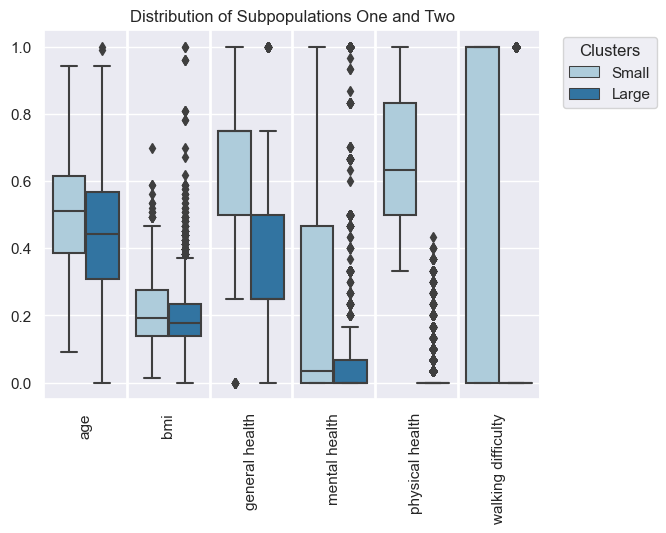

In [20]:
sns.set_palette("Paired")
sns.set_style("darkgrid")
plot = sns.boxplot(data=df_melted,x='variable',y='value',hue='Subpopulation')

plot.set_xticklabels(['age','bmi','general health','mental health','physical health','walking difficulty'])
plot.set_xticklabels(plot.get_xticklabels(), rotation = 90)
plot.set(title='Distribution of Subpopulations One and Two')
plot.set(xlabel=None,ylabel=None)
sns.move_legend(plot,'upper right',
    bbox_to_anchor=(1.25, 1), title='Clusters', frameon=True)
[plot.axvline(x+.5,color='w',linewidth=2) for x in plot.get_xticks()]

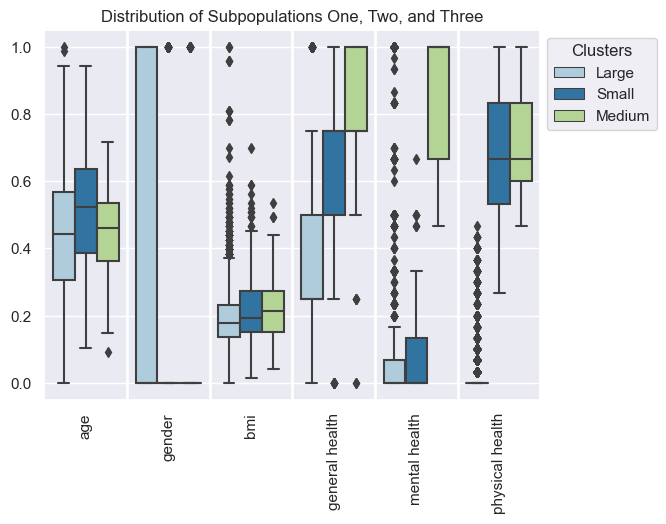

In [21]:

plot = sns.boxplot(data=df3_melted,x='variable',y='value',hue='ClustersNew')

#plot.set_xticklabels(['age','bmi','general health','mental health','physical health','walking difficulty'])
plot.set_xticklabels(plot.get_xticklabels(), rotation = 90)

plot.set_xticklabels(['age','gender','bmi','general health','mental health','physical health'])
plot.set(title='Distribution of Subpopulations One, Two, and Three')
plot.set(xlabel=None,ylabel=None)
sns.move_legend(plot,'upper right',
    bbox_to_anchor=(1.25, 1), title='Clusters', frameon=True)
[plot.axvline(x+.5,color='w',linewidth=2) for x in plot.get_xticks()]

In [22]:
#find number of diseased patients in each cluster - 2 clusters

#create empty dictionary
cluster_dict = dict(cluster_one_disease = 0,cluster_two_disease = 0,cluster_one_no_disease = 0, cluster_two_no_disease= 0)
print(cluster_dict)

#get list of subpopulations and clusters
clusters_list = clusters2_df['Clusters'].tolist()
diseases_list = clusters2_df['disease'].tolist()

#loop through list and update keys in dictionary
for cluster in range(len(clusters_list)):
    if (clusters_list[cluster] == 1) & (diseases_list[cluster] == 1):
        cluster_dict['cluster_one_disease'] +=1
    elif (clusters_list[cluster] == 0) & (diseases_list[cluster] == 1):
        cluster_dict['cluster_two_disease'] +=1
    elif (clusters_list[cluster] == 1) & (diseases_list[cluster] == 0):
        cluster_dict['cluster_one_no_disease'] +=1
    else:
        cluster_dict['cluster_two_no_disease'] +=1

print(cluster_dict)

#if sub = 0 and disease = 0
clusters2_df.head()

#cluster one percent of disease: 0.15997
#cluster two percent of disease: 0.338

#cluster one percent of disease: 0.15997
#cluster two percent of disease: 0.3358
#cluster three percent of disease: 0.3444

{'cluster_one_disease': 0, 'cluster_two_disease': 0, 'cluster_one_no_disease': 0, 'cluster_two_no_disease': 0}


KeyError: 'Clusters'

In [25]:
#number of diseased in each cluster - 3 clusters

#create empty dictionary
clusters3_dict = dict(cluster_one_disease = 0,cluster_two_disease = 0,cluster_one_no_disease = 0, cluster_two_no_disease= 0,
                   cluster_three_disease = 0,cluster_three_no_disease=0)
print(clusters3_dict)

#get list of subpopulations and clusters
clusters_list = clusters3_df['Clusters'].tolist()
diseases_list = clusters3_df['Disease'].tolist()

#loop through list and update keys in dictionary
for cluster in range(len(clusters_list)):
    if (clusters_list[cluster] == 1) & (diseases_list[cluster] == 1):
        clusters3_dict['cluster_one_disease'] +=1
    elif (clusters_list[cluster] == 0) & (diseases_list[cluster] == 1):
        clusters3_dict['cluster_two_disease'] +=1
    elif (clusters_list[cluster] == 1) & (diseases_list[cluster] == 0):
        clusters3_dict['cluster_one_no_disease'] +=1
    elif (clusters_list[cluster] == 2) & (diseases_list[cluster] == 0):
        clusters3_dict['cluster_three_no_disease'] +=1
    elif (clusters_list[cluster] == 2) & (diseases_list[cluster] == 1):
        clusters3_dict['cluster_three_disease'] +=1
    else:
        clusters3_dict['cluster_two_no_disease'] +=1
    

print(clusters3_dict)

#if sub = 0 and disease = 0
clusters2_df.head()

{'cluster_one_disease': 0, 'cluster_two_disease': 0, 'cluster_one_no_disease': 0, 'cluster_two_no_disease': 0, 'cluster_three_disease': 0, 'cluster_three_no_disease': 0}


KeyError: 'Disease'

In [ ]:

clusters3 = clusters3_df.to_csv('clusters3.csv')
clusters2 = clusters2_df.to_csv('clusters2.csv')

In [26]:
#list of categorical/non integer columns
categorical_cols = ['gender','high_chol','chol_check','history_stroke','history_heart_disease','history_smoking','amount_activity',
                'fruits','vegetables','walking_diff','high_bp']

#all columns that contain null values
null_cols = ['high_chol','chol_check','history_heart_disease','history_smoking','amount_activity','alcohol_misuse','fruits',
             'vegetables','health_gen','health_ment','health_phys']

#make categorical values into float values in order to apply mean/median/mode for NaNs
ds1[categorical_cols] = ds1[categorical_cols].apply(LabelEncoder().fit_transform)

#assign dependent variable to disease and drop disease from original dataset
y = ds1['disease']
df = ds1.drop("disease",axis=1)

#train, and test sets
X_train, X_test,y_train,y_test = train_test_split(ds1,y,test_size=0.3)

/var/folders/v1/ymptnwwx3x1b7_mw0nns09wr0000gn/T/ipykernel_15953/2870026227.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  encoded_df[categorical_cols] = encoded_df[categorical_cols].apply(LabelEncoder().fit_transform)


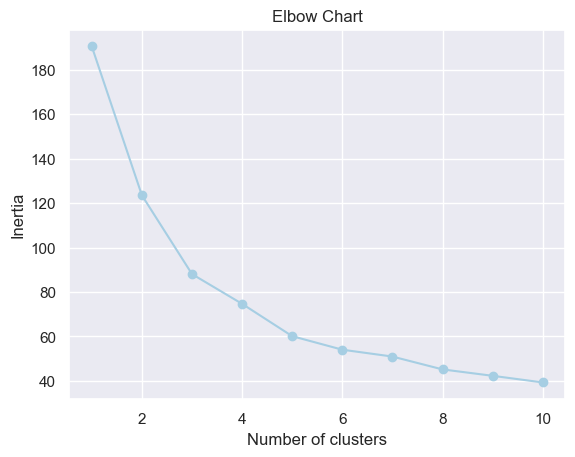

In [27]:
categorical_cols = ['gender','high_chol','chol_check','history_stroke','history_heart_disease','history_smoking','amount_activity',
                'fruits','vegetables','walking_diff','high_bp']

float_cols = ['alcohol_misuse','health_gen','health_ment','health_phys']

#create new df with encoded vals from categorical cols
encoded_df = ds1.dropna()
encoded_df[categorical_cols] = encoded_df[categorical_cols].apply(LabelEncoder().fit_transform)
scaled_df = normalize(encoded_df)
normalized_df = pd.DataFrame(scaled_df, columns=encoded_df.columns)

#do the same with our data
our_df[categorical_cols] = our_df[categorical_cols].apply(LabelEncoder().fit_transform)
scaled_our_df = normalize(our_df)
our_normalized_df = pd.DataFrame(scaled_our_df, columns=our_df.columns)
#encoded_df['cluster'] = kmeans.labels_

sampled_df = normalized_df.sample(n=500, replace=False)

#elbow method for cluster nums
inertias = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(normalized_df)
    inertias.append(kmeans.inertia_)

plt.plot(range(1,11), inertias, marker='o')
plt.title('Elbow Chart')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()


<AxesSubplot:xlabel='age'>

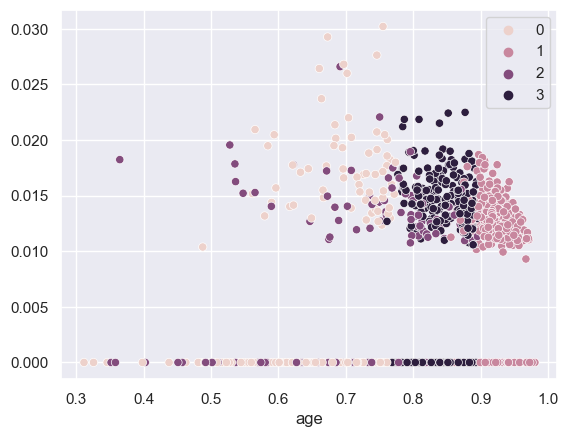

In [28]:
# distributing the dataset into two components X and Y
X = normalized_df.iloc[:, 0:17].values
y = normalized_df.iloc[:, 17].values

#instantiate the k-means class, using optimal number of clusters
kmeans = KMeans(init="random", n_clusters=4, n_init=10, random_state=1)

#fit k-means algorithm to data
label = kmeans.fit_predict(normalized_df)

#view cluster assignments for each observation
kmeans.labels_

#filter rows of original data
filtered_label0 = normalized_df[label == 0]
#print(filtered_label0)
 
#plotting the results
#plt.scatter(filtered_label0[:,0] , filtered_label0[:,1])
#plt.show()

sns.scatterplot(data=normalized_df, x='age', y=y,hue=kmeans.labels_)
#plt.show()

#age, bmi,health_gen, health_ment, health_phys,high_bp,amount_activity,alcohol_misuse, history_smoking,history_heart_disease


In [29]:
# distributing the dataset into two components X and Y
X = encoded_df.iloc[:, 0:17].values
y = encoded_df.iloc[:, 17].values

#create new df with encoded vals from categorical cols
#encoded_df = ds1.dropna()
#encoded_df[categorical_cols] = encoded_df[categorical_cols].apply(LabelEncoder().fit_transform)

X = sc.fit_transform(X)

pca = PCA(n_components = 2)
 
X = pca.fit_transform(X)

explained_variance = pca.explained_variance_ratio_

principalDf = pd.DataFrame(data = X
             , columns = ['principal component 1', 'principal component 2'])
finalDf = pd.concat([principalDf, encoded_df.iloc[:, 17],encoded_df.iloc[:,16],encoded_df.iloc[:,0],
                     encoded_df.iloc[:,2],encoded_df.iloc[:,3],encoded_df.iloc[:,5],encoded_df.iloc[:,6],
                     encoded_df.iloc[:,7],encoded_df.iloc[:,8],encoded_df.iloc[:,9],encoded_df.iloc[:,12],
                     encoded_df.iloc[:,13],encoded_df.iloc[:,14]], axis = 1)
finalDf = finalDf.dropna()

finalDf.head()

sns.scatterplot(data=finalDf,x='principal component 1',y='principal component 2',hue='disease')

#encoded_df.head()
#normalized_df.head()

TypeError: wrapped() missing 1 required positional argument: 'X'

In [30]:
#find all null columns
print(ds1.isnull().sum())

#all columns that contain null values
null_cols = ['high_chol','chol_check','history_heart_disease','history_smoking','amount_activity','alcohol_misuse','fruits',
             'vegetables','health_gen','health_ment','health_phys']

#labels for new columns to show whether the column has been imputed or not
new_cols = ['high_cholmissing','chol_checkmissing','history_heart_diseasemissing','history_smokingmissing','amount_activitymissing',
            'alcohol_misusemissing','fruitsmissing','vegetablesmissing','health_genmissing','health_mentmissing',
            'health_physmissing']

#list of categorical/non integer columns
categorical_cols = ['gender','high_chol','chol_check','history_stroke','history_heart_disease','history_smoking','amount_activity',
                'fruits','vegetables','walking_diff','high_bp']

age                        0
gender                     0
bmi                        0
high_chol                  0
chol_check                 0
history_stroke             0
history_heart_disease      0
history_smoking            0
amount_activity            0
alcohol_misuse           961
fruits                     0
vegetables                 0
health_gen                57
health_ment               75
health_phys                0
walking_diff               0
high_bp                    0
disease                    0
dtype: int64


In [31]:
new_df_mean = ds1
new_df_median = ds1
new_df_mode = ds1
new_df_deleted = ds1

#fill NAN based on mean
new_df_mean[null_cols]=new_df_mean[null_cols].fillna(new_df_mean[null_cols].mean())

#fill NAN based on median
new_df_median[null_cols]=new_df_median[null_cols].fillna(new_df_median[null_cols].median())

#fill NAN based on mode
new_df_mode[null_cols]=new_df_mode[null_cols].fillna(new_df_mode[null_cols].mode())

#delete NAN rows
new_df_deleted = new_df_deleted.dropna(axis=0)


In [32]:
#lists to keep track of results of imputation, will show which imputation is best for the dataset
linear_results = []
linear_labels = []

def test_imputation(df,label):

    #make categorical values into float values in order to apply mean/median/mode for NaNs
    df[categorical_cols] = df[categorical_cols].apply(LabelEncoder().fit_transform)
    
    #assign dependent variable to disease and drop disease from original dataset
    y = df['dissease']
    df = df.drop("dissease",axis=1)

    #perform training and testing to see how well disease is predicted with Nans filled
    X_train, X_test,y_train,y_test = train_test_split(df,y,test_size=0.3)
    lr = LogisticRegression()
    lr.fit(X_train,y_train)
    pred = lr.predict(X_test)
    print(metrics.accuracy_score(pred,y_test))

    #save predictions in lists, to be analyzed later
    linear_results.append(metrics.accuracy_score(pred,y_test))
    linear_labels.append(label)


In [33]:
new_df_two = ds1

#add columns to keep track of whether value was originally NaN
def add_isnull_cols(new_col_name,old_col_name):
    new_df_two[new_col_name] = new_df_two[old_col_name].isnull()

#add original Nan columns for all missing values
def add_all_missings():
    for col in range(len(null_cols)):
        add_isnull_cols(new_cols[col],null_cols[col])

#impute Nans based on adjacent column
def impute_nulls(strategy,df):
    my_imputer = SimpleImputer(strategy = strategy)
    data_new = my_imputer.fit_transform(df)
    #df.info()   

#add_all_missings()

#initialize 3 dfs for mean, median, and mode with this strategy
new_df_mean_two = new_df_two
new_df_median_two = new_df_two
new_df_mode_two = new_df_two

#impute nulls based on mean, median, and mode of adjacent column
#impute_nulls('mean',new_df_mean_two)
#impute_nulls('median',new_df_median_two)
#impute_nulls('most_frequent',new_df_mode_two)

In [34]:
for i in range(1,10):
    test_imputation(new_df_mean,'Prediction Based on Mean')
    test_imputation(new_df_median,'Prediction Based on Median')
    test_imputation(new_df_mode,'Prediction Based on Mode')
    test_imputation(new_df_deleted,'Prediction Based on Deleted NaN Rows')
    test_imputation(new_df_mean_two,'Prediction Based on Mean where Null is Known')
    test_imputation(new_df_median_two,'Prediction Based on Median where Null is Known')
    test_imputation(new_df_mode_two,'Prediction Based on Mode where Null is Known')

KeyError: 'dissease'

In [35]:
regression_analysis = pd.DataFrame()
regression_analysis['nums'] = linear_results
regression_analysis['names'] = linear_labels
regression_analysis.to_csv('regression_analysis.csv')

In [36]:
#impute history_smoking, alcohol_misuse, amount_activity
#fill NAN based on mode
ds1_filled = ds1
three_cols = ['history_smoking','alcohol_misuse','amount_activity']
ds1_filled[three_cols]=ds1_filled[three_cols].fillna(ds1_filled[three_cols].mode())
ds1_filled.isna().sum()
ds1_filled.head()

,age,gender,bmi,high_chol,chol_check,history_stroke,history_heart_disease,history_smoking,amount_activity,alcohol_misuse,fruits,vegetables,health_gen,health_ment,health_phys,walking_diff,high_bp,disease
0,68,0,20,1,0,0,0,0,0,2.000000,1,1,1.0,0.0,0.0,0,1,False
1,54,0,47,1,0,0,0,1,0,1.000000,1,1,3.0,0.0,0.0,0,1,False
2,55,0,30,1,0,0,0,0,0,0.000000,1,1,1.0,0.0,0.0,0,0,False
3,44,0,19,1,1,0,0,2,0,6.000000,1,1,3.0,20.0,6.0,0,1,False
4,61,1,32,1,0,0,0,0,2,2.410883,1,2,2.0,0.0,0.0,1,1,False


In [37]:
ds1_filled.isna()

,age,gender,bmi,high_chol,chol_check,history_stroke,history_heart_disease,history_smoking,amount_activity,alcohol_misuse,fruits,vegetables,health_gen,health_ment,health_phys,walking_diff,high_bp,disease
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5119,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5120,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5121,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5122,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [38]:
#train, validation, test sets
def split_datasets():
    X=ds1_filled[['age','gender','bmi','high_chol','chol_check','history_stroke','history_heart_disease','history_smoking',
                 'amount_activity','alcohol_misuse','fruits','vegetables', 'health_gen','health_ment','health_phys','walking_diff',
                 'high_bp']]
    y=ds1_filled['disease']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=1)

In [39]:
#backward elimination to find best number of features
less_significant_cols = ['age','chol_check','history_stroke','history_heart_disease','amount_activity','vegetables',
                                    'high_bp']

X=ds1_filled[['age','gender','bmi','high_chol','chol_check','history_stroke','history_heart_disease','history_smoking',
                'amount_activity','alcohol_misuse','fruits','vegetables', 'health_gen','health_ment','health_phys','walking_diff',
                'high_bp']]

y=ds1_filled['dissease']


#do logistic regression and find optimum number of features to choose based on coefficient value and regression accuracy score
accuracy_list = []
f1_list = []
precision_list = []
recall_list = []

#for col in less_significant_cols:
    #X.pop(col)

    #training and test
    #X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

    #training and validation
    #X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=1)
    
    #model = LogisticRegression()
    #model.fit(X_train, y_train)

    #y_pred = model.predict(X_val)
    #accuracy = accuracy_score(y_val, y_pred)
    #print("Accuracy: {:.2f}%".format(accuracy * 100))
    #accuracy_list.append(accuracy)
    #print(model.coef_)
    #accuracy = accuracy_score(y_val, y_pred)
    #accuracy_list.append(accuracy)
    #f1 = f1_score(y_val, y_pred)
    #f1_list.append(f1)
    #precision = precision_score(y_val, y_pred)
    #precision_list.append(precision)
    #recall = recall_score(y_val, y_pred)
    #recall_list.append(recall)


KeyError: 'dissease'

In [40]:
print(model.coef_)

#based on previous function, can remove first 4 less significant features, run again and plot
#X=ds1_filled[['gender','bmi','chol_check','history_smoking','amount_activity','alcohol_misuse','fruits','vegetables', 
              #'health_gen','health_ment','health_phys','walking_diff','high_bp']]

#training and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

#training and validation
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=1)
    
model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_val)
our_preds = model.predict(our_normalized_df)
print(our_preds)
#accuracy = accuracy_score(y_val, y_pred)
#print("Accuracy: {:.2f}%".format(accuracy * 100))

#sns.regplot(x=X, y=y, data=ds1_filled,logistic=True)

NameError: name 'model' is not defined

In [41]:
#test on dummy data
#Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

#Create a Random Forest classifier object
clf = RandomForestClassifier(n_estimators=100, max_depth=5)  # Adjust parameters as needed

#Train the model
clf.fit(X_train, y_train)

#Make predictions on the testing set
y_pred = clf.predict(X_test)

#Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

our_pred = clf.predict(our_df)
print(our_pred)



ValueError: Found input variables with inconsistent numbers of samples: [4765, 3707]

In [42]:
#output dummy data prediction results 
our_df.head()

our_df['Predictions'] = our_pred
id_list = [1,2,3,4,5,6,7,8,9,10,11,12,13,14]
our_df['ID'] = id_list
our_df.head()
#sns.barplot(x='Predictions',y='age',hue='gender',data=our_df,color='viridis')
our_df.to_csv('Our-preds.csv')

NameError: name 'our_pred' is not defined

In [43]:
print(len(accuracy_list))
for metric in range(len(accuracy_list)):
    print('Accuracy: ',accuracy_list[metric])
    print('F1: ',f1_list[metric])
    print('Precision: ',precision_list[metric])
    print('Recall: ',recall_list[metric])

NameError: name 'accuracy_list' is not defined

In [44]:
metrics_df = pd.DataFrame(list(zip(accuracy_list, f1_list,precision_list,recall_list)),columns =['accuracy', 
                                                                                                 'f1','precision','recall'])
metrics_df.head()


NameError: name 'accuracy_list' is not defined

In [45]:
#X.pop('health_gen')

#training and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

#training and validation
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=1)
    
model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_val)
print(X_val)



ValueError: Found input variables with inconsistent numbers of samples: [4765, 3707]

In [46]:
accuracy = accuracy_score(y_val, y_pred)
print(accuracy)
f1 = f1_score(y_val, y_pred)
print(f1)
precision = precision_score(y_val, y_pred)
print(precision)
recall = recall_score(y_val, y_pred)
print(recall)

NameError: name 'y_val' is not defined

In [47]:
clustered_df = clustered_df.drop('Unnamed: 0',axis=1)
clustered_df = clustered_df.drop('Subpopulation',axis=1)
sub_pop_pred = model.predict(clustered_df)

NameError: name 'model' is not defined

In [48]:
clustered_df['Disease'] = sub_pop_pred
clustered_df.head()

NameError: name 'sub_pop_pred' is not defined